*Creado por:*

*Isabel Maniega*

In [2]:
from IPython.display import Image

# Pruebas con Pytest

Testear el código puedes obtener una amplia variedad de beneficios. Aumenta la confianza, que el código funcione como se espera, y garantizar que los cambios en el código no provocarán regresiones. Escribir y mantener pruebas es un trabajo duro, por lo que debes aprovechar todas las herramientas a tu disposición para hacerlo lo menos complicado posible. pytest es una de las mejores herramientas que puede utilizar para aumentar la productividad de sus pruebas.

Qué beneficios ofrece pytest:

- Puede ejecutar varias pruebas en paralelo, lo que reduce el tiempo de ejecución del conjunto de pruebas.

- Tiene su propia forma de detectar el archivo de prueba y las funciones de prueba automáticamente, si no se menciona explícitamente.

- Nos permite omitir un subconjunto de pruebas durante la ejecución.

- Nos permite ejecutar un subconjunto de todo el conjunto de pruebas.

- Es gratuito y de código abierto.

- Debido a su sintaxis simple, es muy fácil comenzar con pytest.

In [1]:
# pip install pytest

Creamos una carpeta llamada test.

Pytest le permite escribir funciones de prueba utilizando declaraciones estándar de afirmación de Python, lo que hace que sus pruebas sean limpias y legibles. Para crear una prueba, simplemente defina una función con un nombre que comience con test_ y use aserciones para verificar si se cumple el comportamiento esperado. Aquí hay un ejemplo simple:

In [ ]:
# # test.py

# def result(a, b): 
#     return a * b 
     
# def test_result(): 
#     assert result(2, 3) == 6 
#     assert result(-1, 5) == -5 
#     assert result(0, 0) == 0

Ejecutamos en la consola el script con py.test, como se ve en la imagen siguiente:

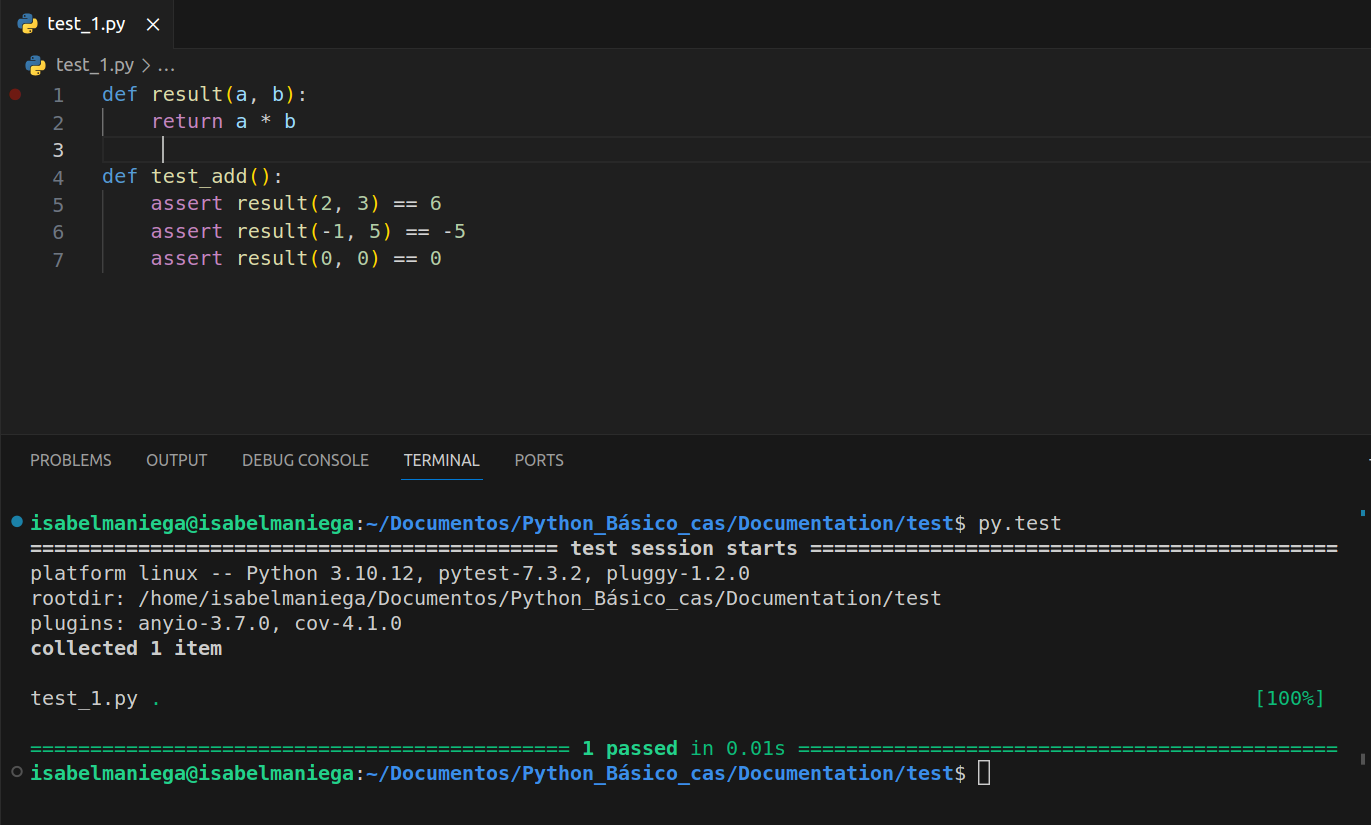

In [5]:
Image('./images/test_2.png')

Observamos que todas las pruebas que hemos realizado pasan el test sin ningún error.

**Accesorios Pytest**

Los accesorios en pytest brindan una forma conveniente de configurar y eliminar recursos reutilizables, como conexiones de bases de datos, archivos temporales o datos de prueba. Le ayudan a mantener un conjunto de pruebas limpio y modular. Para crear un accesorio, use el decorador @pytest.fixture que se muestra en el ejemplo a continuación.

In [ ]:
# test_2.py

# import pytest 

# @pytest.fixture
# def sample_data(): 
#     return {"name": "Isabel Maniega", "age": 100}


# def test_sample_data(sample_data): 
#     assert sample_data["name"] == "Isabel Maniega"
#     assert sample_data["age"] == 100

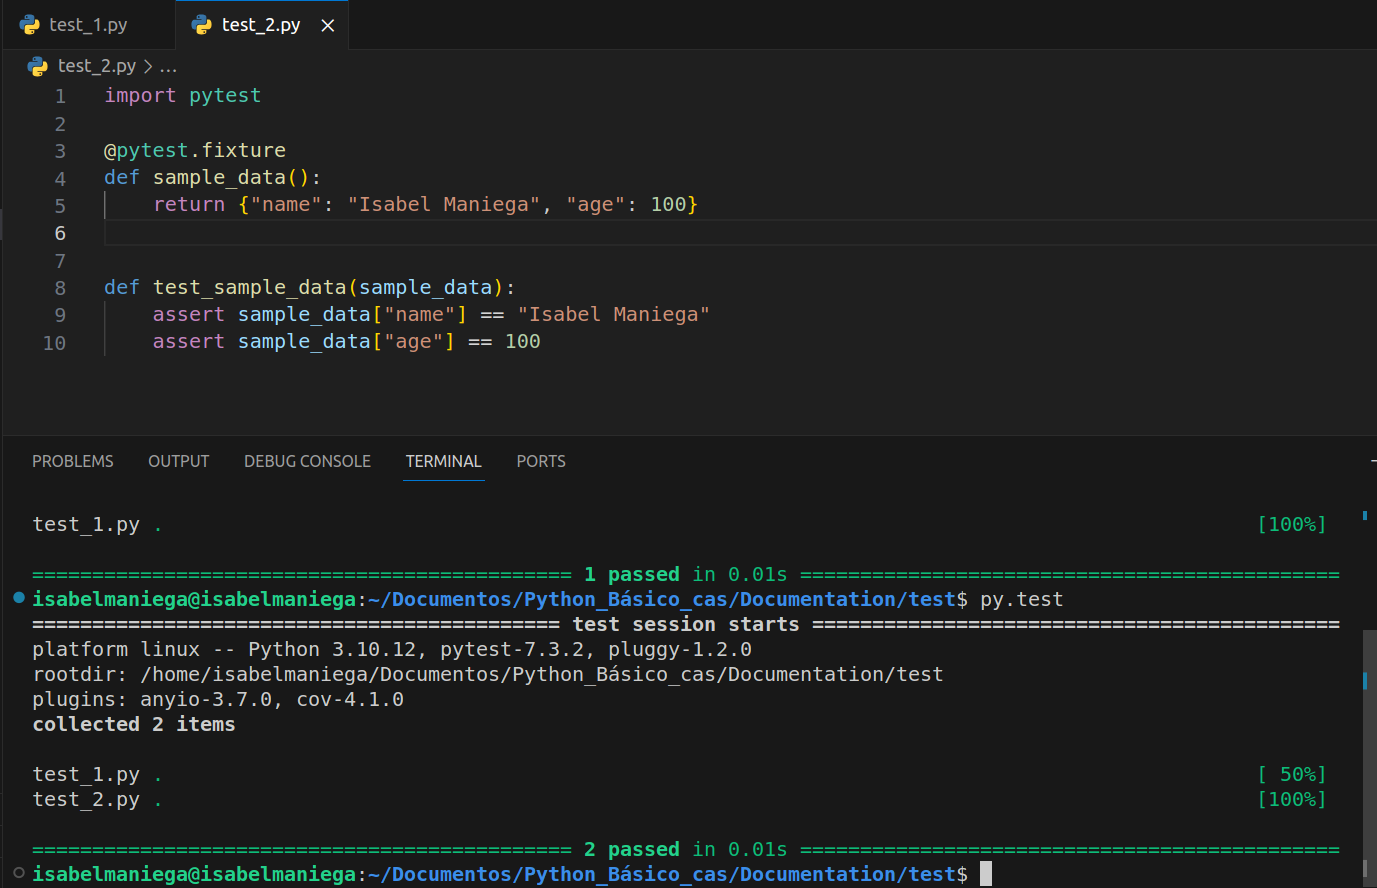

In [6]:
Image('./images/test_3.png')

En el ejemplo anterior, el accesorio sample_data se pasa automáticamente a cualquier función de prueba que lo solicite como parámetro, lo que garantiza datos de prueba coherentes en todo el conjunto de pruebas.

Observamos que todos los archivos nombrados con test_ son ejecutados con el comando py.test y nos avisan si hay algún error, en ellos.

Vamos a ver un ejemplo donde esperamos que el test no pase:

In [ ]:
# # test_3.py

# import pytest

# def division(x, y):
#     result = x / y
#     return result

# def test_zero_division():
#     assert division(3, 1) == 3
#     assert division(3, 0) == 0

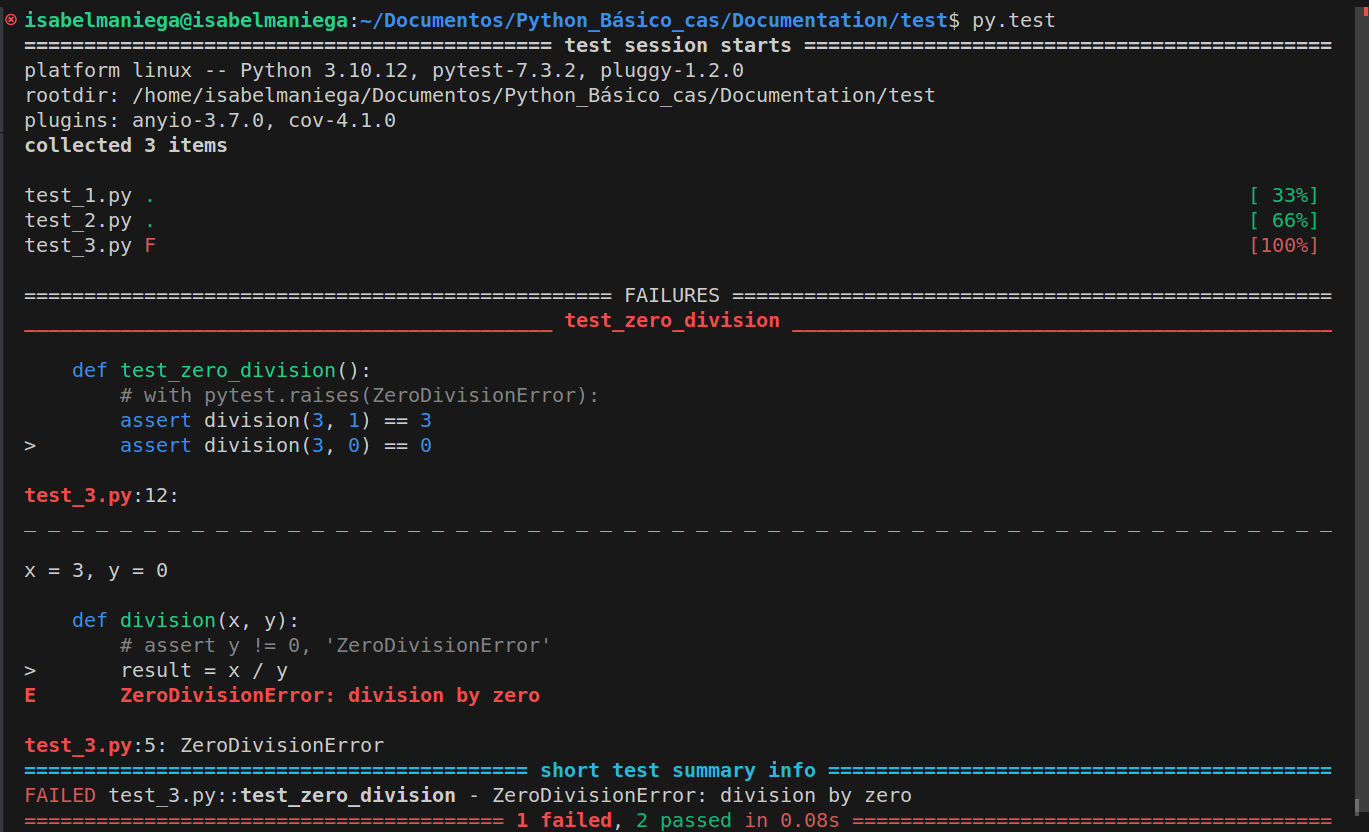

In [7]:
Image('./images/test_4.png')

Se observa con el test_3.py nos pone una F de test erroneo (Fracaso), ya que la división entre 0 nos da un error de Zero Division, por lo tanto el test falla. 

Si usamos el modulo de pytest.raises() para capturar este error, ya identificado:

In [ ]:
# # test_3.py

# import pytest

# def division(x, y):
#     result = x / y
#     return result

# def test_zero_division():
#     with pytest.raises(ZeroDivisionError):
#         division(3, 1)
#         division(3, 0)

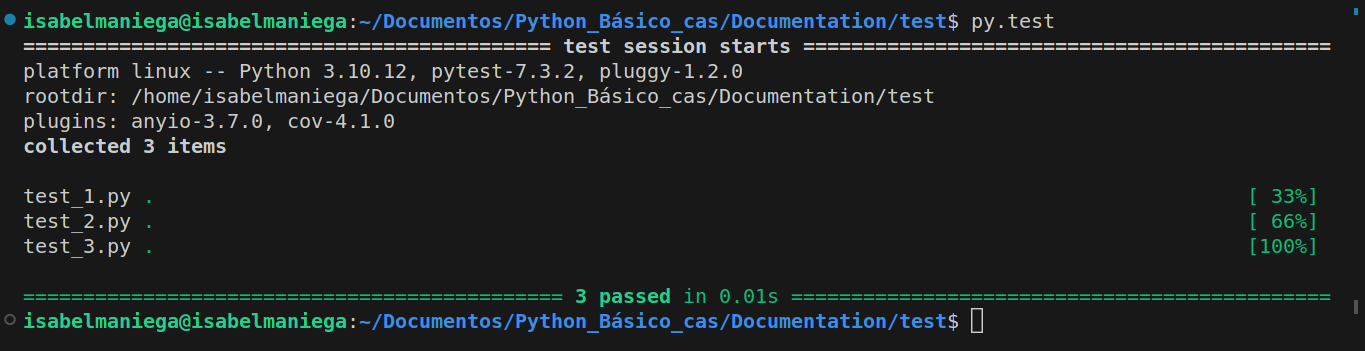

In [8]:
Image('./images/test_5.png')

Observamos que pasa el test, ya que lo hemos capturado.

Otra forma es poner es probar que da un error de ZeroDivision, en el asset capturando la respuesta, esto pasará igualemente el test:

In [ ]:
# test_3.py

# import pytest

# def division(x, y):
#     result = x / y
#     return result

# def test_zero_division():
#     with pytest.raises(ZeroDivisionError) as excinfo:
#         division(3, 1)
#         division(3, 0)
#     assert "division by zero" in str(excinfo.value)

Vamos a usar otra forma de capturar el error como es el decorador: @pytest.mark.xfail

In [ ]:
# # test_3.py

# import pytest

# def division(x, y):
#     result = x / y
#     return result

# @pytest.mark.xfail(raises=ZeroDivisionError)
# def test_zero_division():
#         division(3, 1)
#         division(3, 0)

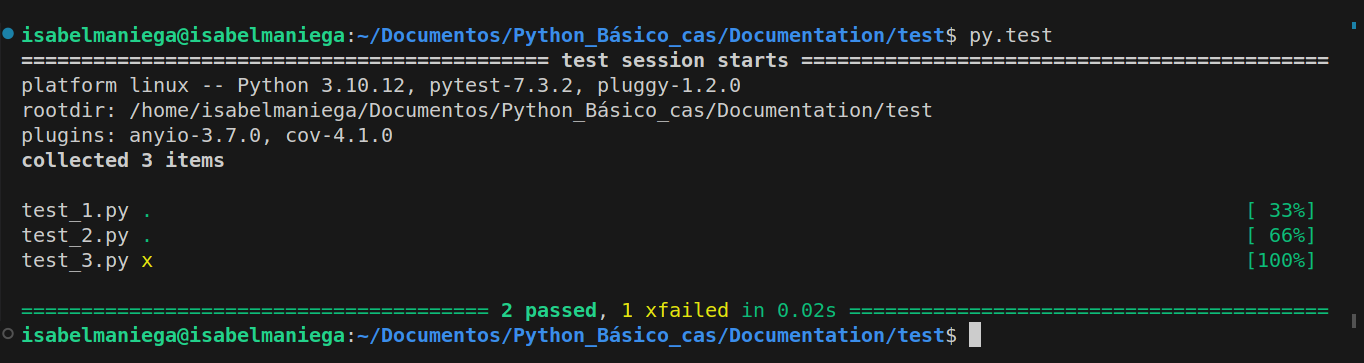

In [9]:
Image('./images/test_6.png')

En este caso falla el test por que detecta un error que hemos tenido en cuenta.

Es probable que usar pytest.raises sea mejor para los casos en los que está probando excepciones que su propio código genera deliberadamente, mientras que usar @pytest.mark.xfail con una función de verificación probablemente sea mejor para algo como documentar errores no corregidos (donde la prueba describe qué "debería" suceder) o errores en las dependencias.

Otra manera de ejecutar es usar el comando *pytest -v*, nos dará algo más de información:

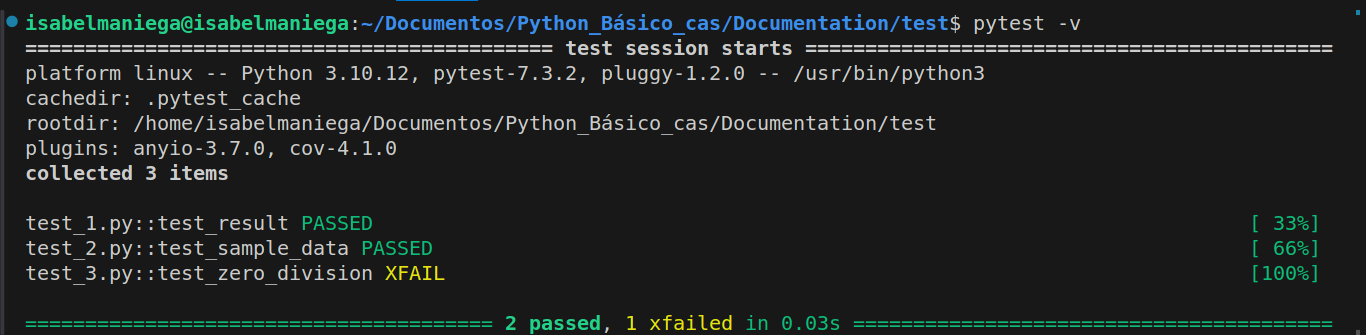

In [10]:
Image('./images/test_7.png')

**PDB**

Los diseñadores de Python crearon pdb, una librería nativa cuyo único propósito es permitir a los desarrolladores inspeccionar la ejecución de sus programas de una forma fácil y rápida.

Con pdb es posible insertar breakpoints en el código fuente sin necesidad de usar un IDE o herramientas externas. Cómo cualquier debugger, pdb permite imprimir el valor de las variables, evaluar el código fuente línea por línea e inspeccionar el funcionamiento interno de las funciones o métodos en un script Python.

Vamos a implementarlo usando en colaboración can la librería Pytest. Para ello usaremos el ejemplo 3 que hemos realizado en el punto anterior:

test_3.py
```
import pytest

def division(x, y):
    result = x / y
    return result

def test_zero_division():
    pytest.set_trace() # Hacemos llamada a pdb para poder realizar el debugging
    assert division(3, 1) == 3
    assert division(3, 0) == 0
```

Para poder ejecutar el debugging, usaremos el siguiente comando:

```
pytest -v --pdb
```

In [ ]:
# # test_3.py

# import pytest

# def division(x, y):
#     result = x / y
#     return result

# def test_zero_division():
#     pytest.set_trace()
#     assert division(3, 1) == 3
#     assert division(3, 0) == 0

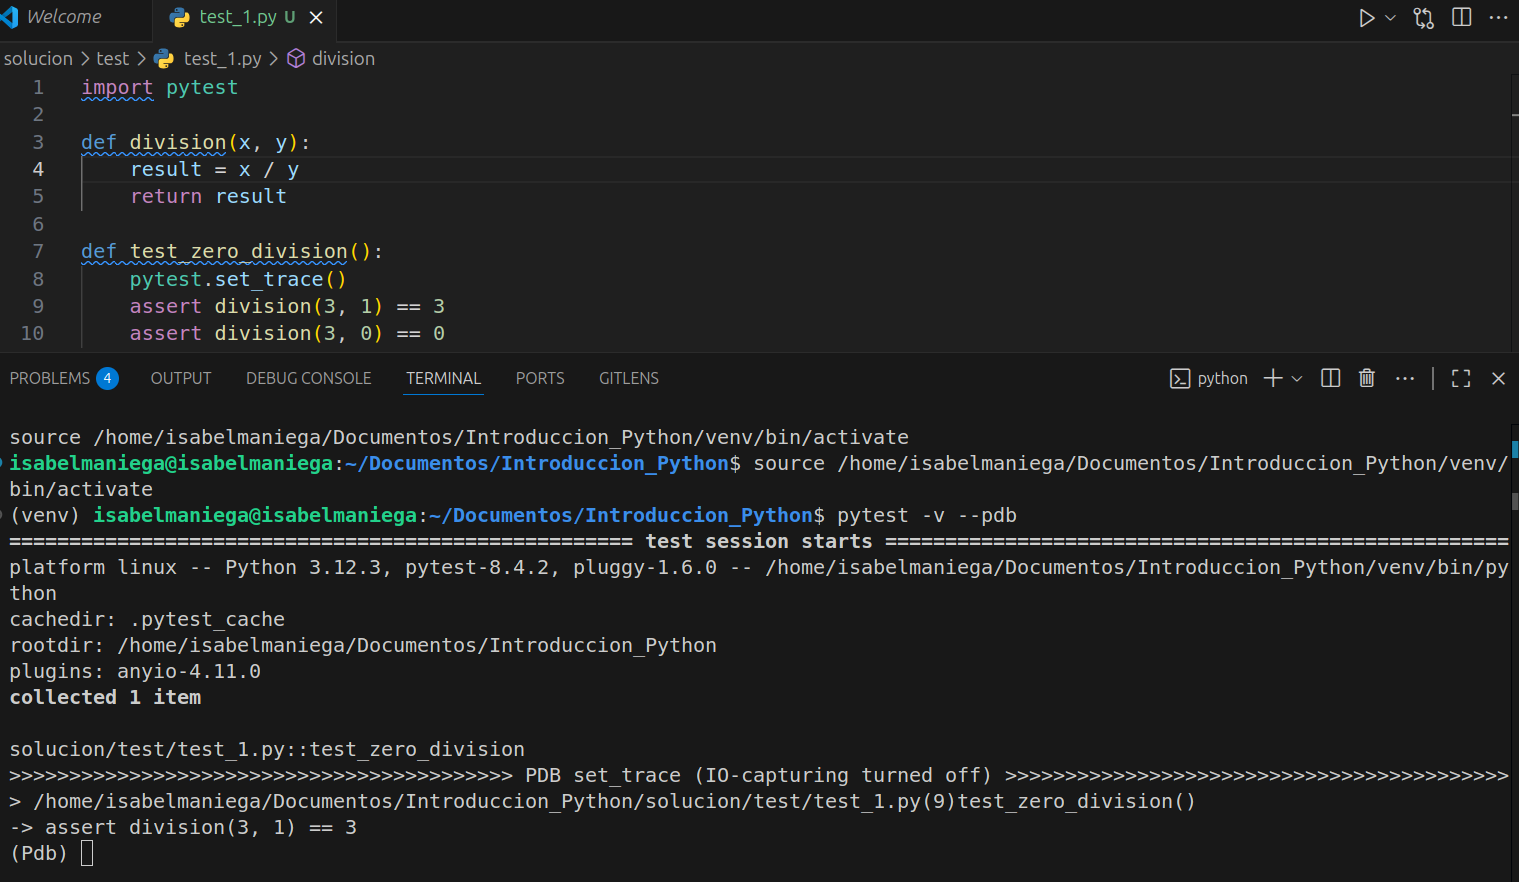

In [3]:
Image('./images/test_8.png')

Se observa en la imagen la ejecución del depurador que se queda a la espera de ejecutar los comandos que se nombran a continuación.
En este caso el depurador se queda en la primera línea.

Existen varios comandos que puedes ejecutar en la consola de pdb para depurar tu código, como monitorizar variables, establecer puntos de interrupción, ejecutar el código línea por línea, entrar en una función, etc. A continuación, se muestran algunos de los comandos:

* **n(next)** – Avanza a la siguiente línea dentro de la misma función.

* **s(step)** – Avanza a la siguiente línea en esta función o en una función llamada.

* **b(break)** – Establece nuevos puntos de interrupción sin modificar el código.

* **p(print)** – Evalúa e imprime el valor de una expresión.

* **c(continue)** – Continúa la ejecución y solo se detiene al encontrar un punto de interrupción.

* **unt(until)** – Continúa la ejecución hasta alcanzar la línea con un número mayor que la actual.

* **q(quit)** – Finaliza la ejecución del depurador.


Si seleccionamos la opción `s` podemos testear las distintas variables que se le pueden pasar a la función y detectar los distintos errrores que podemos encontrar, tal y como observamos en la imagen:

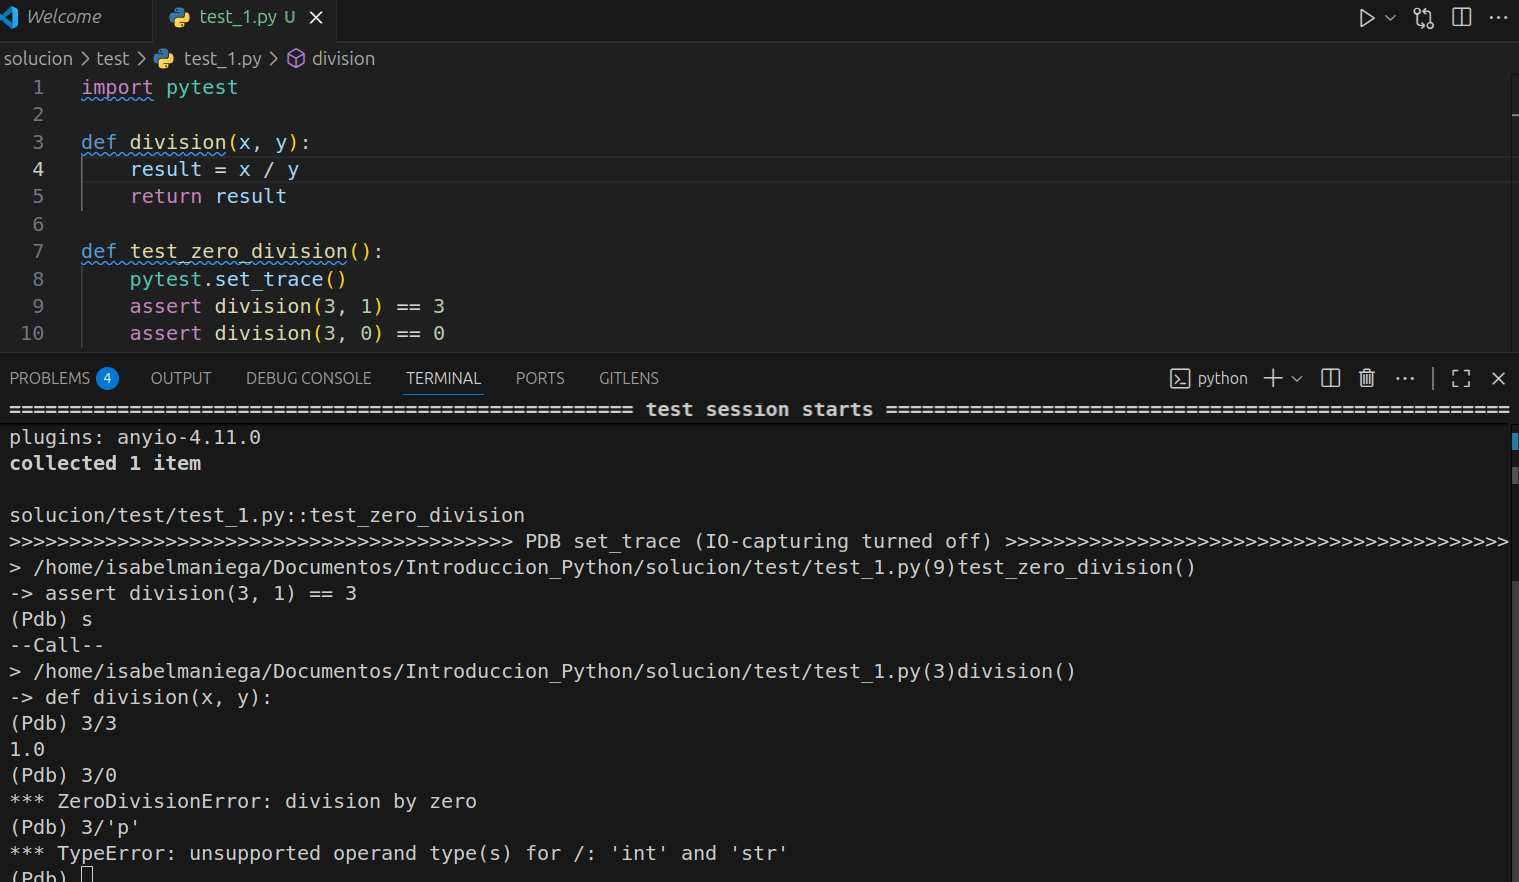

In [4]:
Image('./images/test_9.png')

Si pulsamos a la opcion `n` iremos ejecutando línea a línea hasta testear el código descrito:

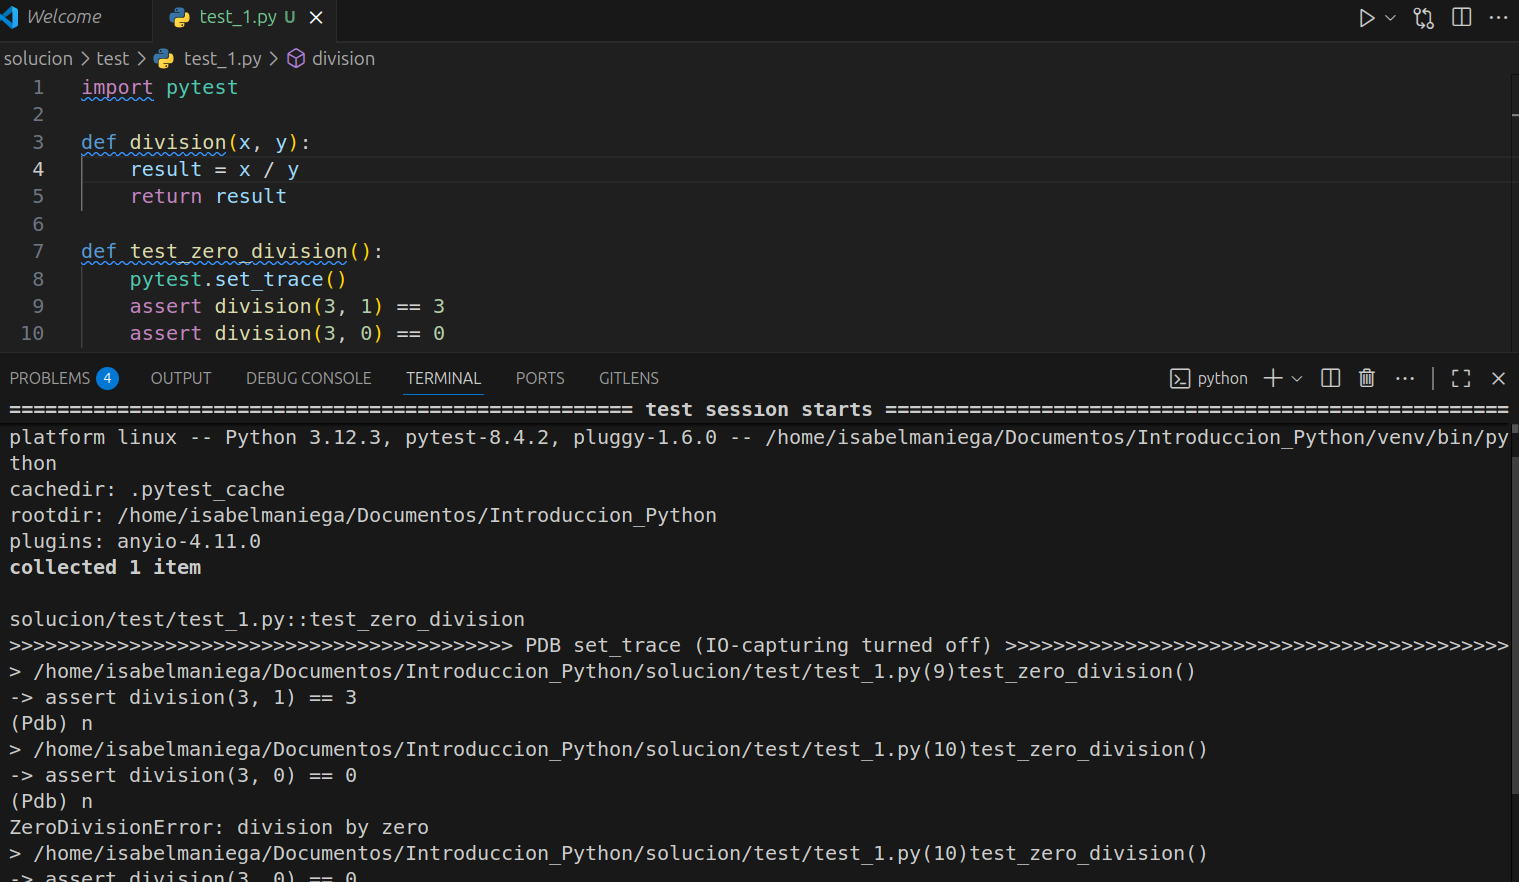

In [5]:
Image('./images/test_10.png')

Observamos que en la lína siguiente detecta un error de ZeroDivisionError.

Si ponemos la opción `c`, ejecutará todo el código hasta un punto de parada Breakpoint, en este caso no hemos descrito ninguno, por lo tanto ejecutará el código hasta detectar la excepción:

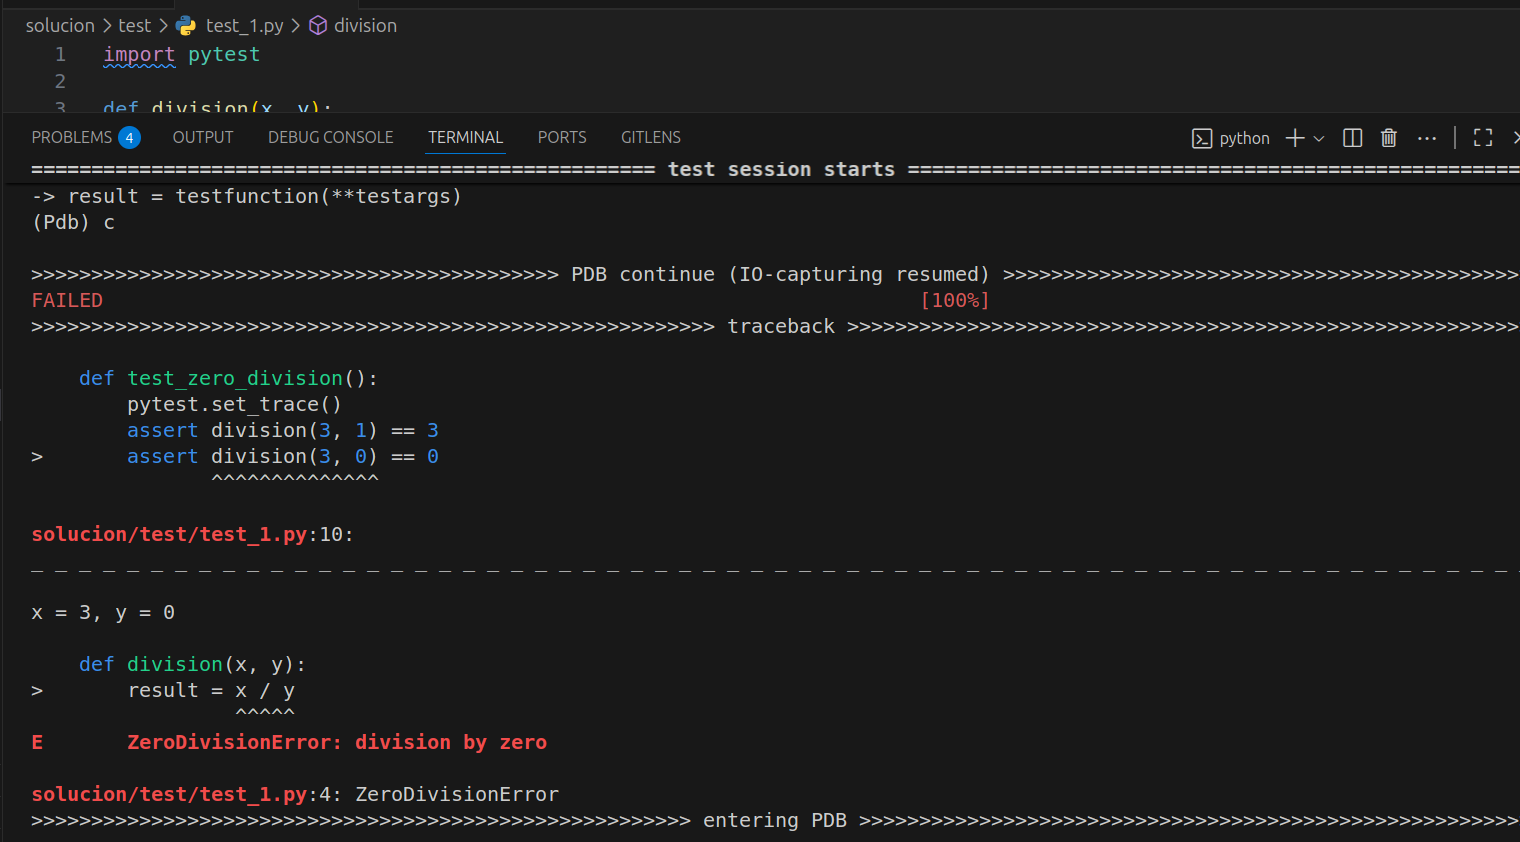

In [10]:
Image('./images/test_11.png')

Si queremos añadir un punto de parada (Breakpoint) en el código y testee hasta esa línea lo asignaremos en con el comando `b`, en este caso en la línea 10, haciendo que el código continue hasta esa línea, ejecutando posteriormente con el comando `c` tal como se muestra en la imagen:

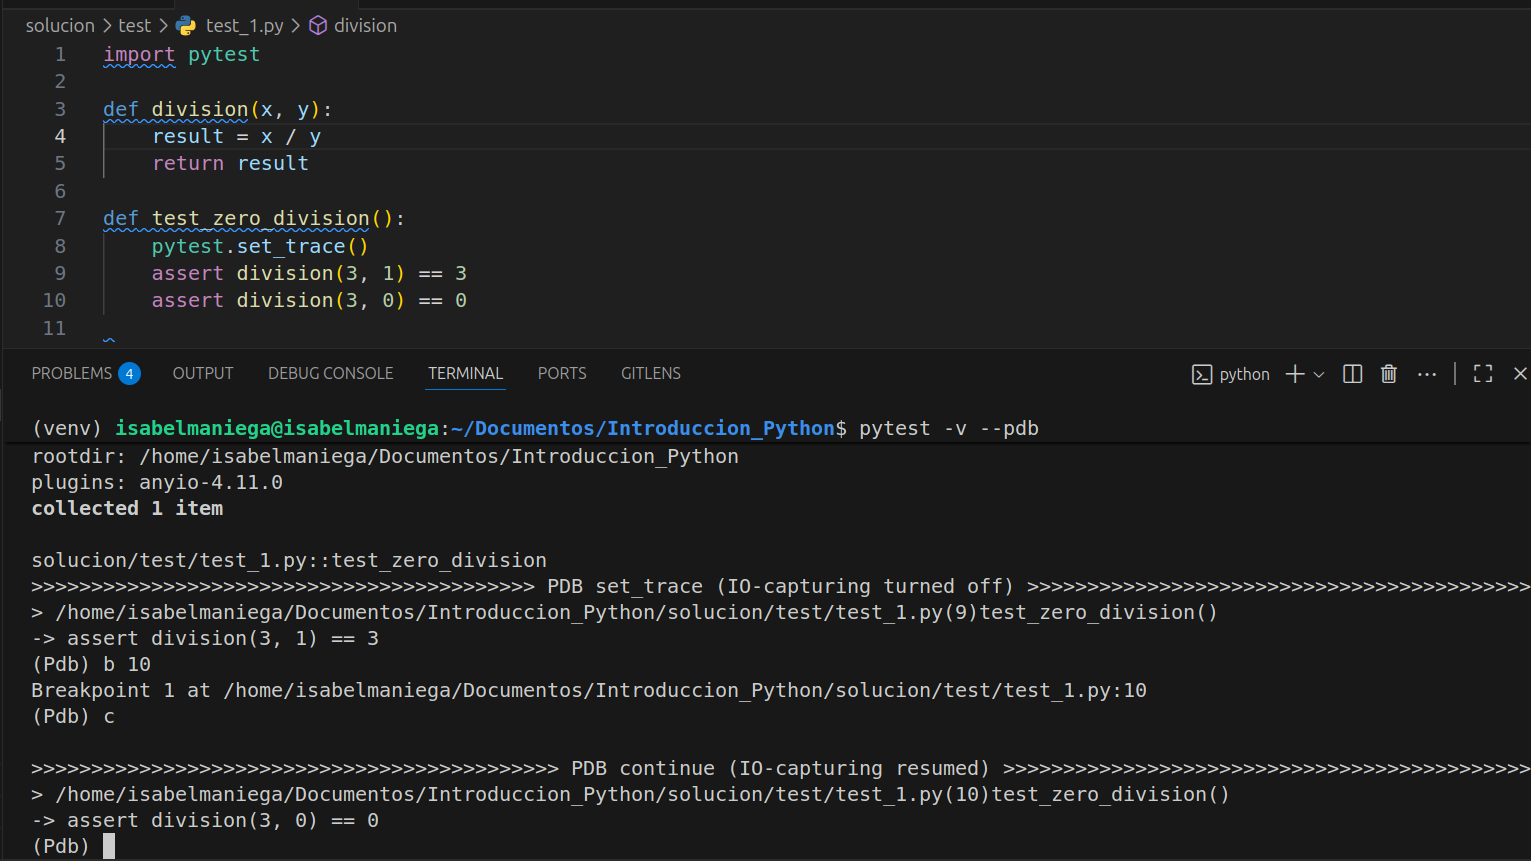

In [11]:
Image('./images/test_12.png')

Para salir pulsaremos el comando `q`

*Creado por:*

*Isabel Maniega*